# Basemap and Shapefiles

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon

## The Basemap object

The basemap object requires a region to be specified and the projection.  You can also specify the axes that you want to plot onto.  The basemap package has data built into it for plotting coastlines, county borders, continents, states, rivers, etc.  You can plot these with methods built into the basemap class.

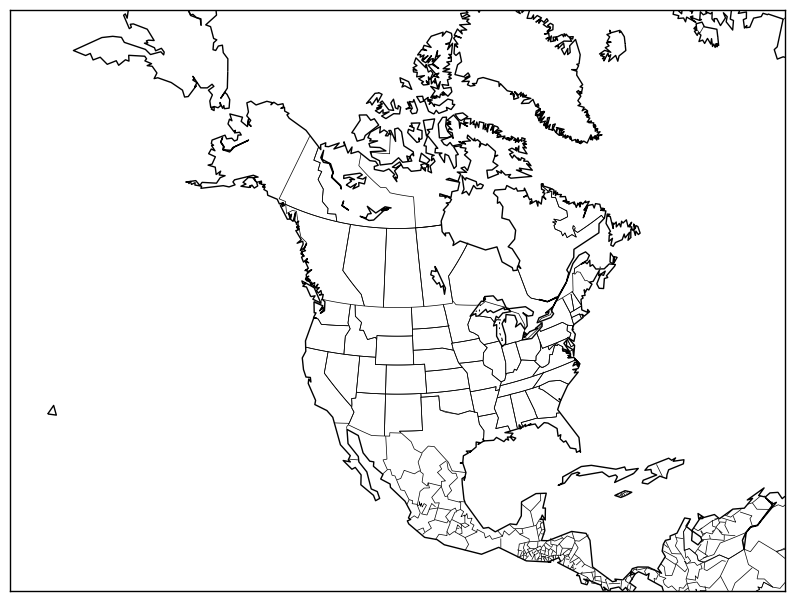

In [2]:
figsize = [10,10]; dpi=80
fig = plt.figure(1, figsize = figsize, dpi = dpi)
ax = fig.add_subplot(111)
bmap = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107., ax = ax)
bmap.drawstates()
bmap.drawcoastlines()
bmap.drawcountries()
plt.show()

## Different projections

Let's look at the effect of different projections.  You can change the projection and this changes how latitude and longitudes are translated to map coordinates.  See <a href="http://matplotlib.org/basemap/users/mapsetup.html">available projections</a> for basemap.

In [188]:
def draw_us(width=2e7,proj='lcc'):
    figsize = [10,10]; dpi=80
    fig = plt.figure(1, figsize = figsize, dpi = dpi)
    ax = fig.add_subplot(111)
    bmap = Basemap(width=width,height=width,projection=proj,
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107., ax = ax)
    bmap.drawstates()
    bmap.drawcoastlines()
    bmap.drawcountries()
    ax.set_title('Projection: ' + bmap.projection)
    plt.show()

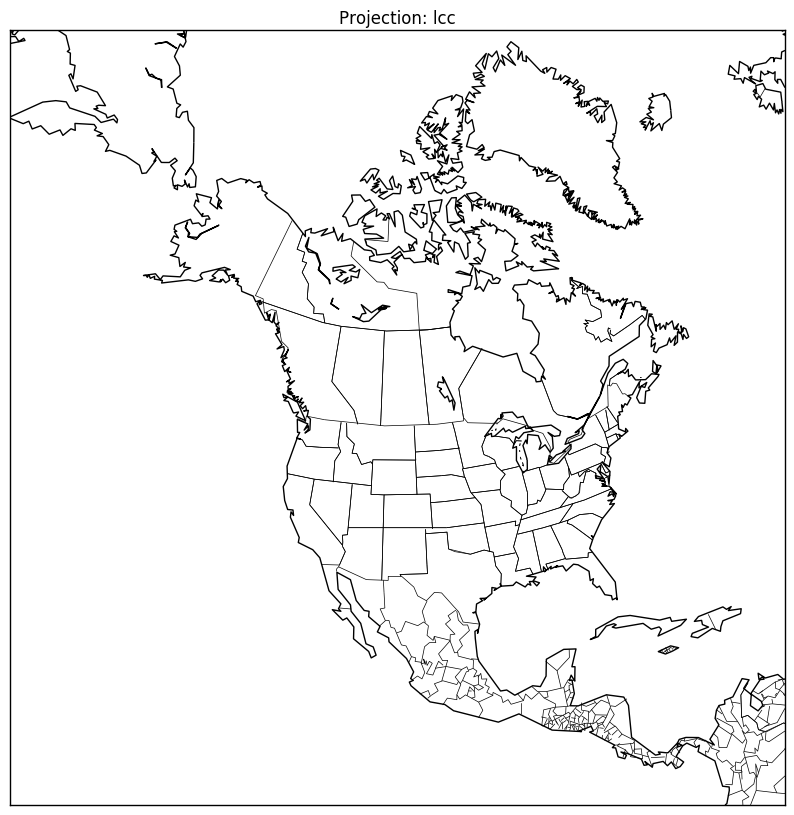

In [189]:
draw_us(width=1e7)

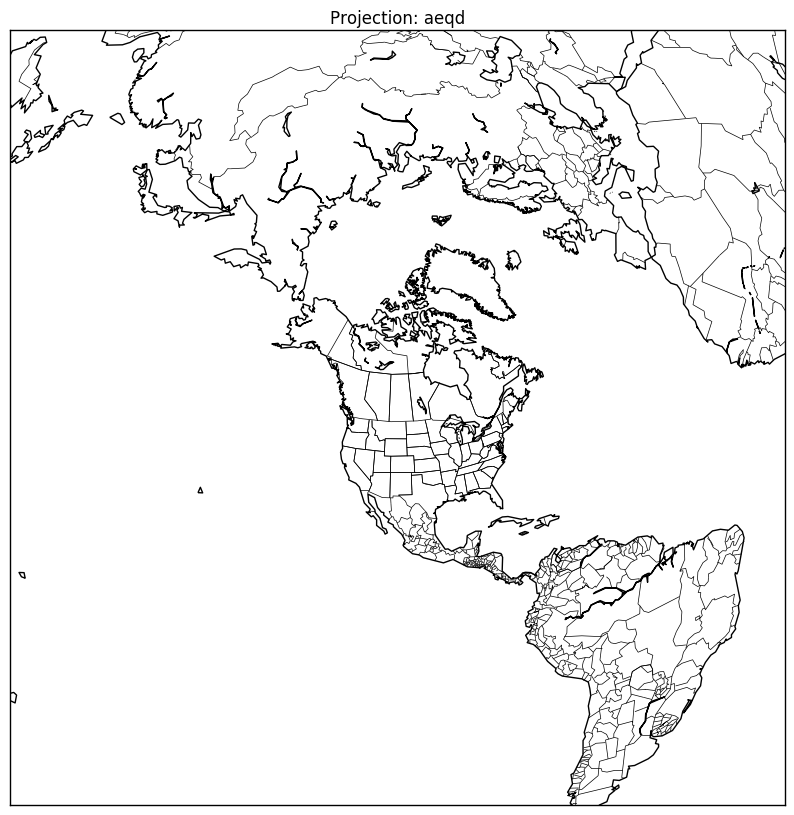

In [190]:
draw_us(proj='aeqd')

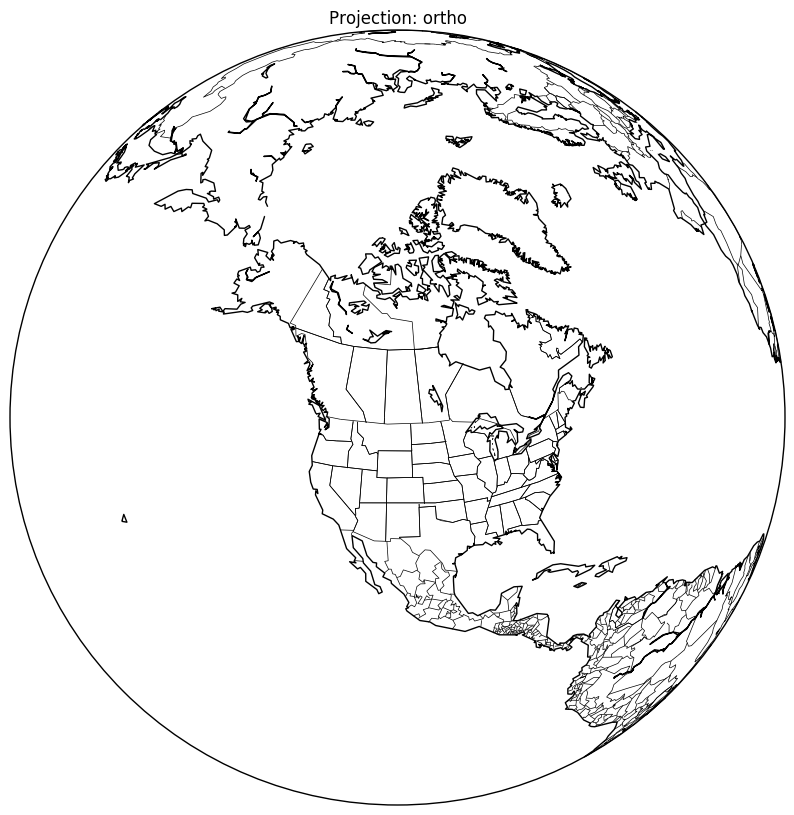

In [191]:
draw_us(proj='ortho')

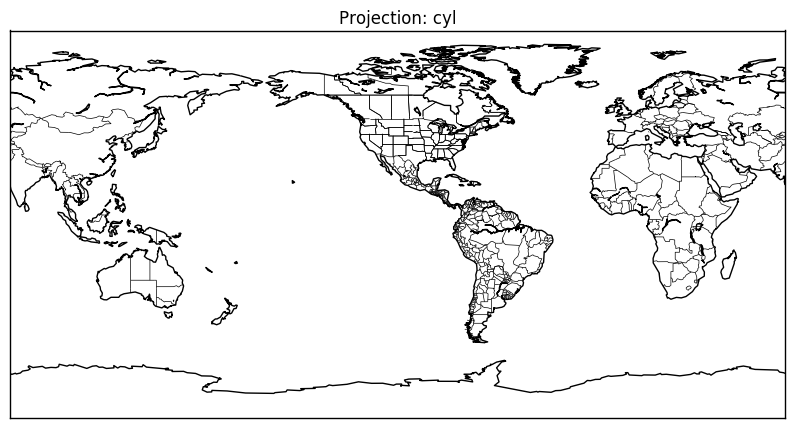

In [192]:
draw_us(proj='cyl')

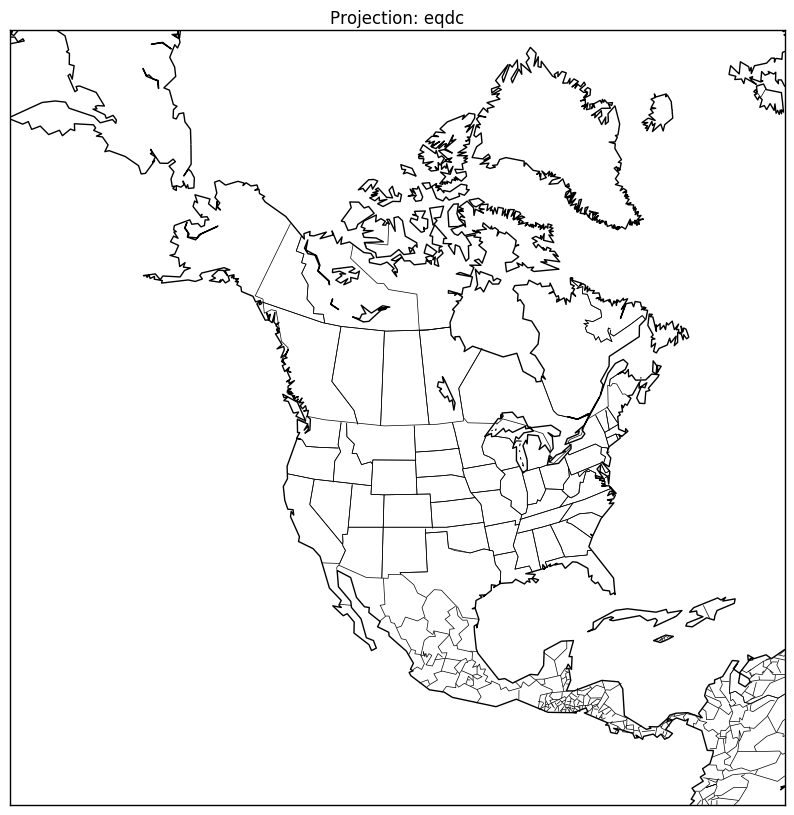

In [193]:
draw_us(proj='eqdc',width=1e7)

## Loading and drawing shapes from shapefiles

Using the readshapefiles method, we can read a shapefile, in this case the US aquifers.  The US aquifers consists of polygons denoting the aquifers in the US.  If you do not set the drawboundaries argument to False then it will automatically draw the objects (polygons) in the map.  

In [3]:
def draw_aquifers(figsize = [10,10],dpi=80,where='Cont'):
    fig = plt.figure(1, figsize = figsize, dpi = dpi)
    ax = fig.add_subplot(111)
    if where=='Cont':
        bmap = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
                               urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
                               lon_0=-95, resolution='i', area_thresh=10000, ax = ax)
    if where=='US':
        bmap = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107., ax = ax)
    bmap.readshapefile('aquifrp025','aquifers') #this tells you to read the aquifrp025 files
    return ax, fig, bmap

In [5]:
ax, fig, bmap = draw_aquifers()
print (bmap.aquifers_info[0])
print (bmap.aquifers[0][0:10])

OSError: Unable to open boundary dataset file. Only the 'crude' and  'low',
resolution datasets are installed by default.
If you are requesting an, 'intermediate', 'high' or 'full'
resolution dataset, you may need to download and install those
files separately with
`conda install -c conda-forge basemap-data-hires`.

Because the second argument in readshapefile was 'aquifers' you can access the shapes via bmap.aquifers.

In [117]:
ax.set_title('US Aquifers')

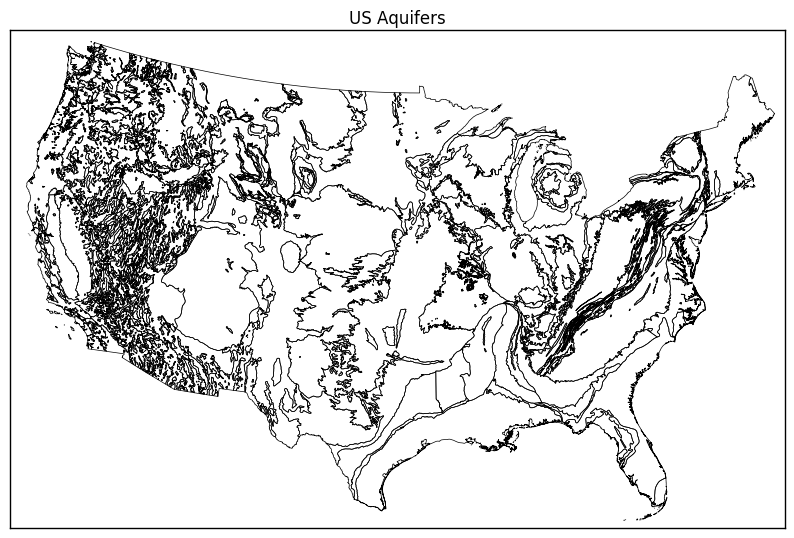

In [118]:
plt.show()

## Using patches objects to draw

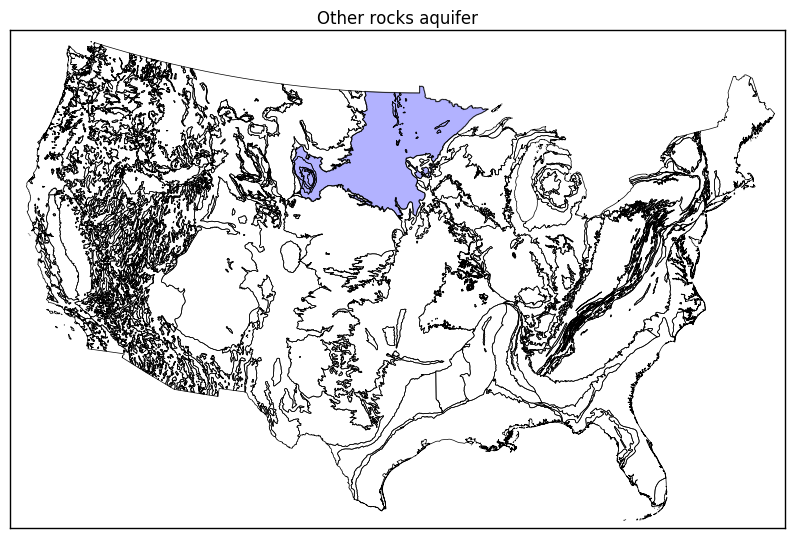

In [194]:
ax, fig, bmap = draw_aquifers()
aqI = 0
pp = Polygon(bmap.aquifers[aqI],fc='b',alpha=.3,zorder=1)
aquiname = bmap.aquifers_info[aqI]['AQ_NAME']
ax.add_patch(pp)
ax.set_title(aquiname + " aquifer")
plt.show()

We previously imported the patches, Wedge, Circle, and Polygon.  We are using Polygon (which has to be in the map coordinates) to plot an individual aquifer.

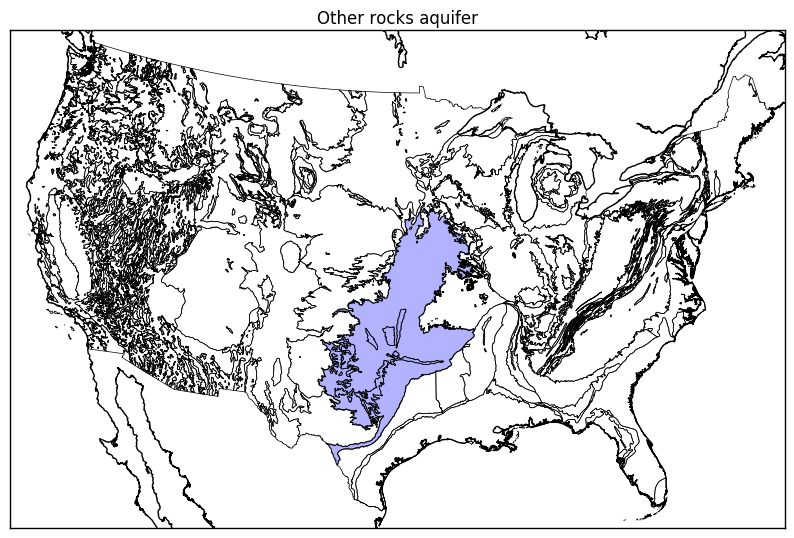

In [165]:
ax, fig, bmap = draw_aquifers()
bmap.drawcoastlines()
aqI = np.argmax([float(inf['Shape_Area']) for inf in bmap.aquifers_info]) #select the largest area
pp = Polygon(bmap.aquifers[aqI],fc='b',alpha=.3,zorder=1)
aquiname = bmap.aquifers_info[aqI]['AQ_NAME']
ax.add_patch(pp)
ax.set_title(aquiname + " aquifer")
plt.show()

## Plotting data on maps

In the arsenic_nov2001 text file, we have measured Arsenic concentrations in groundwater wells.  I want to overlay the concentrations over the aquifer data to see if there is an aquifer that is particularly concentrated with As.

In [195]:
ars_file = open("arsenic_nov2001.txt","rb")
col_names = ars_file.readline().split()
wtf = ars_file.readline()
lat_long = []
conc = []

for l in ars_file:
    ls = l.split()
    conc.append(float(ls[-3]))
    lat_long.append((-float(ls[-1]),float(ls[-2])))

C = len(conc)
conc_rank = ss.rankdata(conc) / float(C)    

In [196]:
lat_long[0]

(-64.75528, 18.35361)

In [197]:
ax, fig, bmap = draw_aquifers()
conc_rank = ss.rankdata(conc) / float(C)    
patches = []
for i in range(C):
    patches.append(Wedge(bmap(*lat_long[i]),5e4,45,90,alpha = .5,
                         facecolor=(1.,1.-conc_rank[i]**2.,0.),edgecolor='none'))

In [105]:
for pat in patches:
    ax.add_patch(pat)

In [79]:
conc_rank[3]

0.27293818290675048

In [85]:
bmap(*lat_long[3]) #??????????

(5742148.245688091, -277715.3579230886)

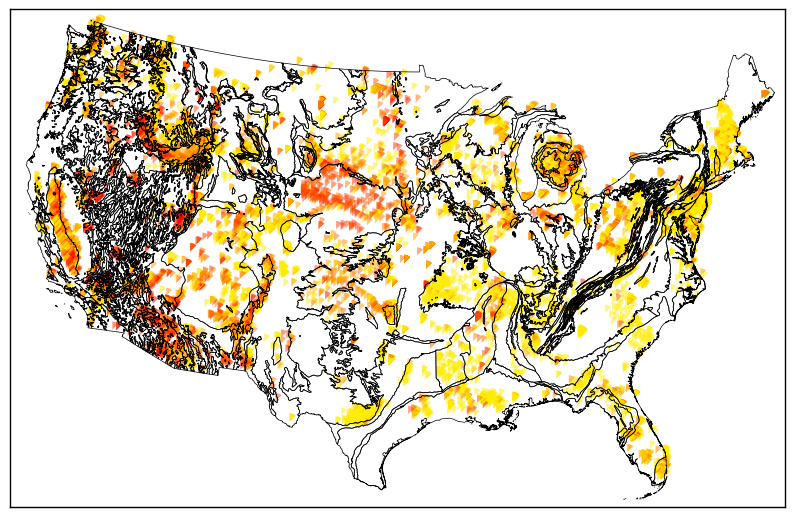

In [106]:
plt.show()

It looks like there's high concentrations in the west, especially, Nebraska and in parts of the Rocky Mountains.